In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import xarray as xr
import geopandas as gpd
import regionmask

In [6]:
file = r"/home/sara/Documenti/GitHub/Climate-and-conflict/all codes/TA_PA_DL_no-prot_somalia_dummies.csv"
df = pd.read_csv(file)

In [7]:
file = r"/home/sara/Documenti/GitHub/Climate-and-conflict/drought/spei01.nc"

with xr.open_dataset(file) as file_nc:
    drought_xr = file_nc

drought_xr

FileNotFoundError: [Errno 2] No such file or directory: '/home/sara/Documenti/GitHub/Climate-and-conflict/drought/spei01.nc'

In [8]:
path = r"/home/sara/Documenti/GitHub/Climate-and-conflict/Datasets/som_adm_ocha_itos_20230308_shp/som_admbnda_adm1_ocha_20230308.shp"
states_gdf = gpd.read_file(path) 

In [9]:
def get_aoi(shp, world=True):
    lon_lat = {}
    # Get lat min, max
    aoi_lat = [float(shp.total_bounds[1]), float(shp.total_bounds[3])]
    aoi_lon = [float(shp.total_bounds[0]), float(shp.total_bounds[2])]

    lon_lat["lon"] = aoi_lon
    lon_lat["lat"] = aoi_lat
    return lon_lat

bounds = get_aoi(states_gdf)

In [10]:
#transform time to datetime
pd.to_datetime(drought_xr['time'].values)

NameError: name 'drought_xr' is not defined

In [ ]:
start_date = '1901-01-16'
end_date = '2021-12-16'

region = drought_xr['spei'].sel(
    #time=slice(start_date, end_date),
    lon=slice(bounds["lon"][0], bounds["lon"][1]),
    lat=slice(bounds["lat"][0], bounds["lat"][1]))

In [ ]:
region_mask = regionmask.mask_3D_geopandas(states_gdf,
                                         drought_xr.lon,
                                         drought_xr.lat)

somalia = region.where(region_mask).groupby("time").mean(["lat", "lon"]).to_dataframe().reset_index()

In [ ]:
replacement_dict = {0  :  'Awdal',
1    :         'Bakool',
2      :       'Banadir',
3      :         'Bari',
4       :         'Bay',
5        :  'Galgaduud',
6          :      'Gedo',
7          :   'Hiraan',
8   :       'Lower Juba',
9   :   'Lower Shabelle',
10  :      'Middle Juba',
11   : 'Middle Shabelle',
12    :          'Mudug',
13    :        'Nugaal',
14      :       'Sanaag',
15       :        'Sool',
16        :   'Togdheer',
17   : 'Woqooyi Galbeed'}

somalia['region'] = somalia['region'].replace(replacement_dict)

In [ ]:
summary1=somalia[somalia['time']==start_date]

# merge states_gdf with summary1 based on column 'region'
merged = states_gdf.merge(summary1, left_on='ADM1_EN', right_on='region')

In [ ]:
# Slice the data
start_date =  '2000-01-16'
end_date =  '2000-01-16'

one_month_region = drought_xr["spei"].sel(
    time=slice(start_date, end_date),
    lon=slice(bounds["lon"][0], bounds["lon"][1]),
    lat=slice(bounds["lat"][0], bounds["lat"][1]))

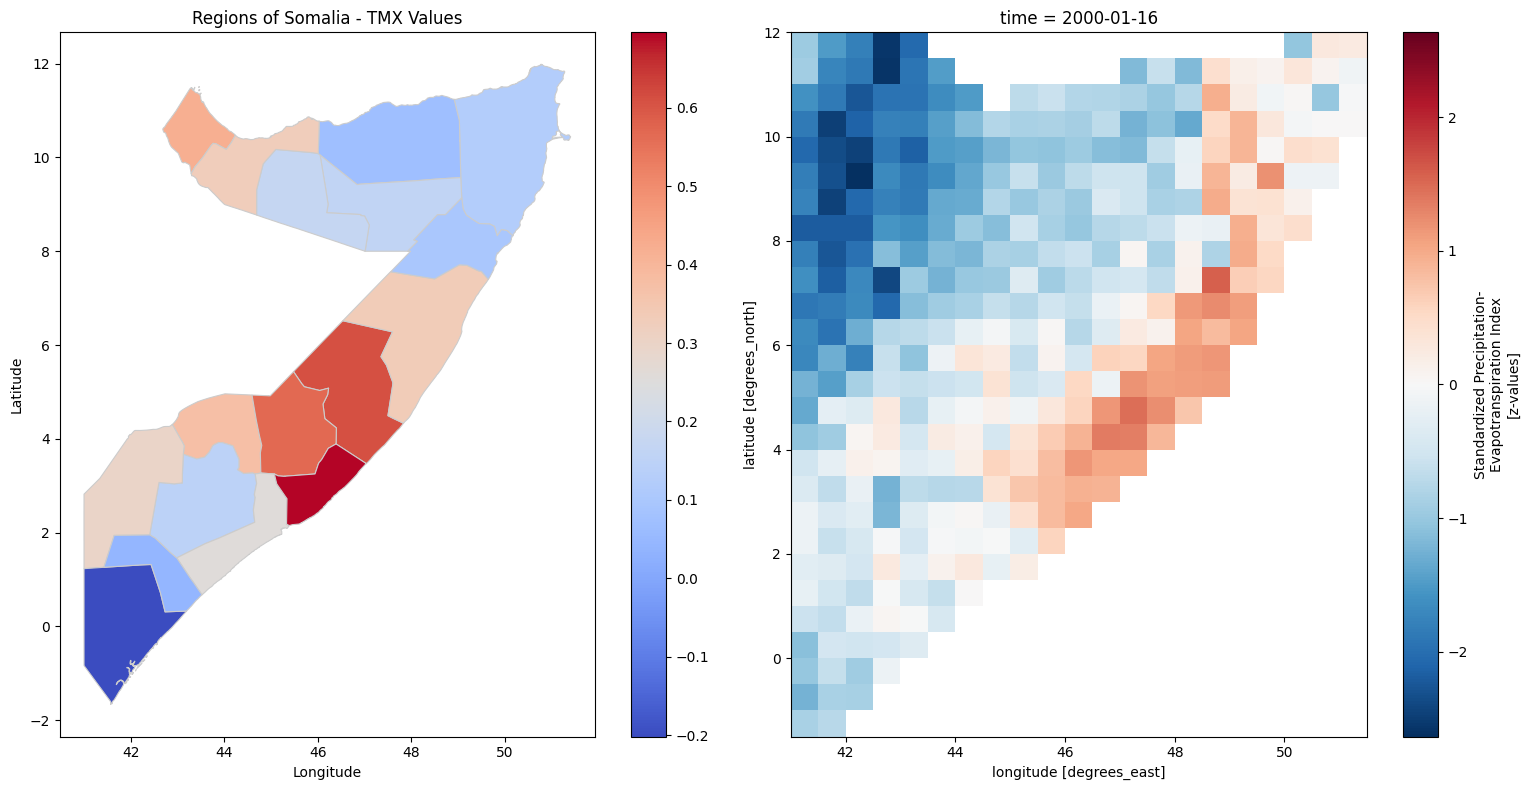

In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first map - Regions of Somalia colored by tmx
merged.plot(column='spei', cmap='coolwarm', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)
ax1.set_title('Regions of Somalia - TMX Values')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Plot the second map - two_months_region
one_month_region.plot(ax=ax2)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#superimpose the two plots
fig, ax = plt.subplots(figsize=(16, 8))
merged.plot(column='spei', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
one_month_region.plot(ax=ax)
ax.set_title('Regions of Somalia - TMX Values')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# rename column region to admin1
somalia = somalia.rename(columns={'region': 'admin1'})
#somalia.to_csv(r'C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\drought\spei_somalia.csv', index = False)

In [ ]:
# fai la linear regression con questi dati